In [1]:
#Veri Analizi

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

# Model Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

C:\Users\samsung\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
startups = pd.read_csv("50_Startups.csv")
df = startups.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


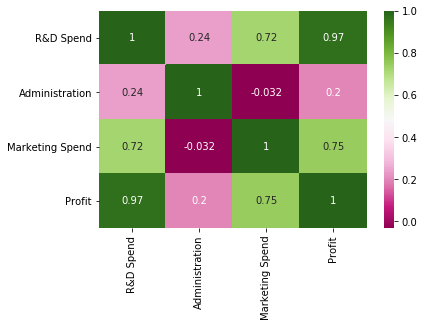

In [6]:
sns.heatmap(df.corr(), annot = True, cmap = "PiYG" );

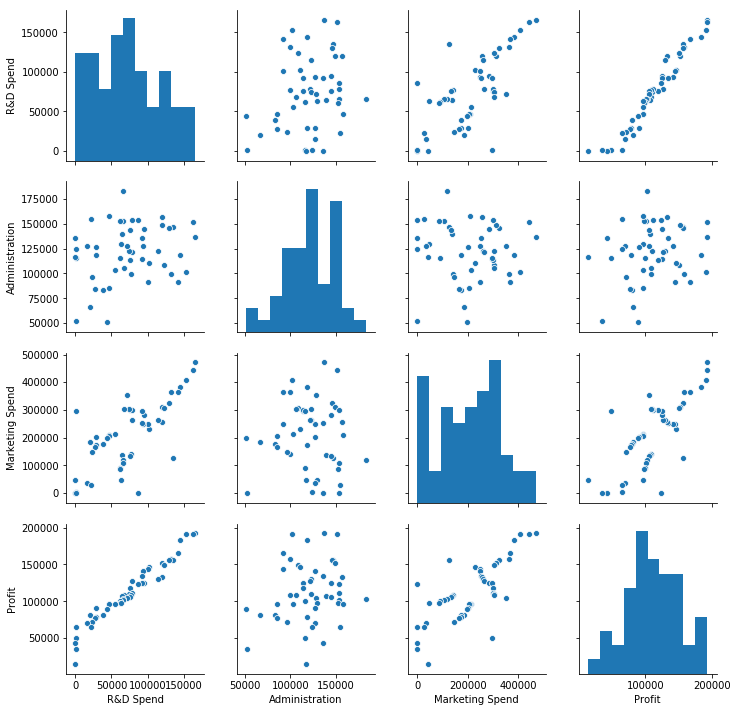

In [7]:
sns.pairplot(df);

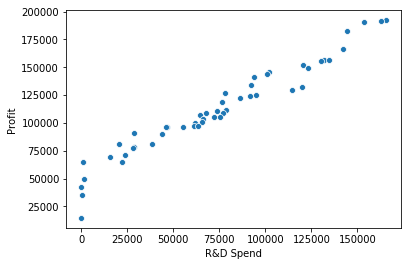

In [8]:
sns.scatterplot(x = "R&D Spend", y = "Profit", data = df); # R&D Spend değişkeni ile bağımlı değişkenimiz arasında çok güçlü bir bağ mevcut

In [9]:
df["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

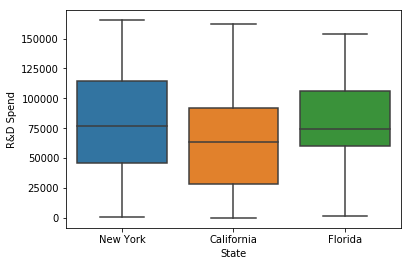

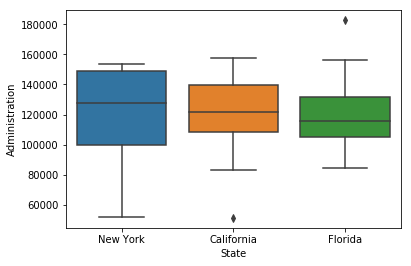

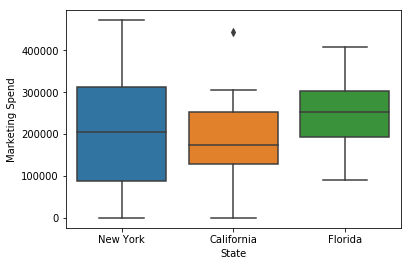

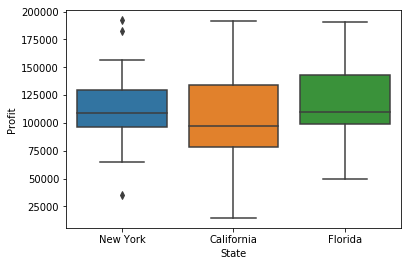

In [10]:
for col in df.select_dtypes(include="number").columns:
    sns.boxplot(x = "State" , y = col, data = df)
    plt.show()

In [11]:
df =pd.get_dummies(df,columns= ["State"], drop_first=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## Standard Scaler

In [12]:
a = df.iloc[:,:3]

In [13]:
b = df.iloc[:,-3:]

In [14]:
df_scale = StandardScaler().fit_transform(a)

In [15]:
df_s = pd.DataFrame(df_scale,columns = df.columns[:3])

In [16]:
df_s.head()

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [17]:
df2 = pd.concat([df_s,b],axis=1)

In [18]:
df2.head() #Scaled df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,2.016411,0.560753,2.153943,192261.83,0,1
1,1.955860,1.082807,1.923600,191792.06,0,0
2,1.754364,-0.728257,1.626528,191050.39,1,0
3,1.554784,-0.096365,1.422210,182901.99,0,1
4,1.504937,-1.079919,1.281528,166187.94,1,0


In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# Model

## Scale Edilmiş Df

In [20]:
y=df2["Profit"]
X=df2.drop("Profit", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [21]:
models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))

In [22]:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 9055.957323497805
Ridge 9170.244103849092
Lasso 9054.704901496145
ElasticNet 11198.761498319798
KNN 18345.93286434643
CART 12673.801728762759
RF 9491.45703147442
SVR 30913.818852691013
GBM 7910.544819648757
XGBoost 7767.020695730044


## Scale Edilmemiş Df

In [23]:
y=df["Profit"]
X=df.drop("Profit", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [24]:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 9055.957323458471
Ridge 9049.186353499546
Lasso 9055.617160312679
ElasticNet 9014.868435160368
KNN 23895.260822109114
CART 9609.203110405146
RF 8106.185100516797
SVR 30911.323613876684
GBM 8747.08155790803
XGBoost 7767.020695730044


In [25]:
# İki durumda da en iyi model xgboost olmuştur ve rmse değerleri aynıdır

In [26]:
xgb_model = XGBRegressor().fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7767.020695730044

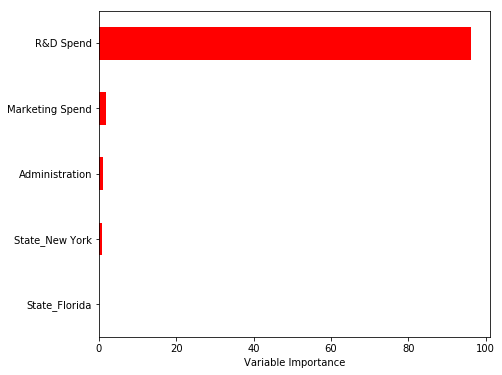

In [27]:
Importance = pd.DataFrame({'Importance':xgb_model.feature_importances_*100},index = X_train.columns)

Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r', figsize=(7,6))

plt.xlabel('Variable Importance')
plt.gca().legend_ = None


In [28]:
xgb_model.score(X_test, y_test)

0.9255035799343959

# Model Tuning

In [29]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
xgb_params = {"max_depth" : [3,4,5,6], "learning_rate" : [0.01,0.1,0.3,0.5], "n_estimators" : [100,200,500,1000], "colsample_bytree" : [0.5,0.6,0.9,1]}

In [31]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, param_grid = xgb_params, cv = 10).fit(X_train, y_train)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [32]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1000}

In [33]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.01, max_depth = 3, n_estimators = 1000)
xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [34]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

13116.740847416193

In [35]:
xgb_tuned.score(X_test, y_test)

0.7875394239500346